In [22]:
import fidimag
from fidimag.micro import Sim
from fidimag.common import CuboidMesh
from fidimag.micro import Zeeman, Demag, DMI, UniformExchange
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Here we set parameters of the system. We choose a 250 x 80 x 3 nm$^3$ nanotrack, and apply periodicity in the x-direction to approximate an infinite nanotrack.

In [43]:
dx = dy = 2.5
dz = 1.0


Lx = 250.0
Ly = 80.0
Lz = 3.0
nx = int(Lx/dx)
ny = int(Ly/dy)
nz = int(Lz/dz)

mesh = CuboidMesh(nx=nx, ny=ny, nz=nz, dx=dx, dy=dy, dz=dz,
                  unit_length=1e-9, periodicity=(True, False, False))

We choose material parameters for Fe0.7Co0.3Si as used in the paper "Skyrmions in thin films with easy-plane magnetocrystalline anisotropy" (http://dx.doi.org/10.1063/1.4945262). We set the initial state to be uniform in the +z direction.

In [44]:
Ms = 9.5e4  # magnetisation saturation (A/m)
A = 4e-13  # exchange stiffness (J/m)
D = 2.7e-4  # DMI constant (J/m**2)
H = (0, 0, 3.8e5)  # external magnetic field (A/m)

K0 = D**2 / A
K1 = -0.16*K0

alpha = 0.5  # Gilbert damping
gamma = 2.211e5  # gyromagnetic ratio (m/As)

sim  = Sim(mesh)  # create simulation object

# Set parameters.
sim.Ms = Ms
sim.driver.alpha = alpha
sim.driver.gamma = gamma
sim.driver.do_precession = False

# Add energies.
sim.add(UniformExchange(A=A))
sim.add(DMI(D))
sim.add(Zeeman(H))
sim.add(Demag(pbc_2d=True))
# Seed random number generator so that this simulation is reproducible.
np.random.seed(0)

def m_init(pos):
    m = np.random.uniform(-1, 1, 3)
    return m

sim.set_m(m_init, normalise=True)

We now relax the system to find a metastable state.

In [45]:
sim.driver.relax(dt=1e-13, stopping_dmdt=0.1, max_steps=5000, save_m_steps=None, save_vtk_steps=None)

#1    t=1e-13    dt=1e-13 max_dmdt=7.78e+04
#2    t=2e-13    dt=1e-13 max_dmdt=7.99e+04
#3    t=3e-13    dt=1e-13 max_dmdt=8.02e+04
#4    t=4e-13    dt=1e-13 max_dmdt=7.76e+04
#5    t=5e-13    dt=1e-13 max_dmdt=7.97e+04
#6    t=6e-13    dt=1e-13 max_dmdt=7.75e+04
#7    t=7e-13    dt=1e-13 max_dmdt=7.6e+04
#8    t=8e-13    dt=1e-13 max_dmdt=7.94e+04
#9    t=9e-13    dt=1e-13 max_dmdt=8.26e+04
#10   t=1e-12    dt=1e-13 max_dmdt=8.09e+04
#11   t=1.1e-12  dt=1e-13 max_dmdt=7.43e+04
#12   t=1.2e-12  dt=1e-13 max_dmdt=7.65e+04
#13   t=1.3e-12  dt=1e-13 max_dmdt=7.76e+04
#14   t=1.4e-12  dt=1e-13 max_dmdt=7.48e+04
#15   t=1.5e-12  dt=1e-13 max_dmdt=7.09e+04
#16   t=1.6e-12  dt=1e-13 max_dmdt=6.41e+04
#17   t=1.7e-12  dt=1e-13 max_dmdt=6.47e+04
#18   t=1.8e-12  dt=1e-13 max_dmdt=6.4e+04
#19   t=1.9e-12  dt=1e-13 max_dmdt=6.21e+04
#20   t=2e-12    dt=1e-13 max_dmdt=6.01e+04
#21   t=2.1e-12  dt=1e-13 max_dmdt=5.71e+04
#22   t=2.2e-12  dt=1e-13 max_dmdt=5.64e+04
#23   t=2.3e-12  dt=1e-13 max_dmdt

#181  t=2.35e-11 dt=1.93e-13 max_dmdt=1.51e+04
#182  t=2.37e-11 dt=1.93e-13 max_dmdt=1.48e+04
#183  t=2.39e-11 dt=1.93e-13 max_dmdt=1.44e+04
#184  t=2.41e-11 dt=1.93e-13 max_dmdt=1.39e+04
#185  t=2.43e-11 dt=1.93e-13 max_dmdt=1.35e+04
#186  t=2.44e-11 dt=1.93e-13 max_dmdt=1.3e+04
#187  t=2.46e-11 dt=1.93e-13 max_dmdt=1.24e+04
#188  t=2.48e-11 dt=1.93e-13 max_dmdt=1.19e+04
#189  t=2.5e-11  dt=1.93e-13 max_dmdt=1.13e+04
#190  t=2.52e-11 dt=1.93e-13 max_dmdt=1.09e+04
#191  t=2.54e-11 dt=1.93e-13 max_dmdt=1.1e+04
#192  t=2.56e-11 dt=1.93e-13 max_dmdt=1.11e+04
#193  t=2.58e-11 dt=1.93e-13 max_dmdt=1.11e+04
#194  t=2.6e-11  dt=1.93e-13 max_dmdt=1.11e+04
#195  t=2.62e-11 dt=1.93e-13 max_dmdt=1.11e+04
#196  t=2.64e-11 dt=1.93e-13 max_dmdt=1.1e+04
#197  t=2.66e-11 dt=1.93e-13 max_dmdt=1.09e+04
#198  t=2.68e-11 dt=1.93e-13 max_dmdt=1.07e+04
#199  t=2.69e-11 dt=1.93e-13 max_dmdt=1.05e+04
#200  t=2.72e-11 dt=2.89e-13 max_dmdt=1.06e+04
#201  t=2.75e-11 dt=2.89e-13 max_dmdt=1.1e+04
#202  t=2.78e-11 

#359  t=1.6e-10  dt=1.81e-12 max_dmdt=1.46e+03
#360  t=1.61e-10 dt=1.81e-12 max_dmdt=1.41e+03
#361  t=1.64e-10 dt=2.74e-12 max_dmdt=1.34e+03
#362  t=1.67e-10 dt=2.74e-12 max_dmdt=1.27e+03
#363  t=1.7e-10  dt=2.74e-12 max_dmdt=1.2e+03
#364  t=1.72e-10 dt=2.74e-12 max_dmdt=1.13e+03
#365  t=1.75e-10 dt=2.74e-12 max_dmdt=1.08e+03
#366  t=1.78e-10 dt=2.74e-12 max_dmdt=1.07e+03
#367  t=1.81e-10 dt=2.74e-12 max_dmdt=1.06e+03
#368  t=1.83e-10 dt=2.74e-12 max_dmdt=1.05e+03
#369  t=1.86e-10 dt=2.74e-12 max_dmdt=1.04e+03
#370  t=1.89e-10 dt=2.74e-12 max_dmdt=1.02e+03
#371  t=1.92e-10 dt=2.74e-12 max_dmdt=997
#372  t=1.94e-10 dt=2.74e-12 max_dmdt=975
#373  t=1.97e-10 dt=2.74e-12 max_dmdt=951
#374  t=2e-10    dt=2.74e-12 max_dmdt=929
#375  t=2.03e-10 dt=2.74e-12 max_dmdt=924
#376  t=2.05e-10 dt=2.74e-12 max_dmdt=917
#377  t=2.08e-10 dt=2.74e-12 max_dmdt=910
#378  t=2.11e-10 dt=2.74e-12 max_dmdt=901
#379  t=2.14e-10 dt=2.74e-12 max_dmdt=891
#380  t=2.16e-10 dt=2.74e-12 max_dmdt=880
#381  t=2.19e-10 

#553  t=1.22e-09 dt=9.8e-12 max_dmdt=246
#554  t=1.23e-09 dt=9.8e-12 max_dmdt=245
#555  t=1.24e-09 dt=9.8e-12 max_dmdt=243
#556  t=1.25e-09 dt=9.8e-12 max_dmdt=242
#557  t=1.26e-09 dt=9.8e-12 max_dmdt=240
#558  t=1.27e-09 dt=9.8e-12 max_dmdt=237
#559  t=1.28e-09 dt=9.8e-12 max_dmdt=238
#560  t=1.29e-09 dt=9.8e-12 max_dmdt=242
#561  t=1.3e-09  dt=9.8e-12 max_dmdt=246
#562  t=1.31e-09 dt=9.8e-12 max_dmdt=250
#563  t=1.32e-09 dt=9.8e-12 max_dmdt=253
#564  t=1.33e-09 dt=9.8e-12 max_dmdt=256
#565  t=1.34e-09 dt=9.8e-12 max_dmdt=258
#566  t=1.35e-09 dt=9.8e-12 max_dmdt=260
#567  t=1.36e-09 dt=9.8e-12 max_dmdt=262
#568  t=1.37e-09 dt=9.8e-12 max_dmdt=263
#569  t=1.38e-09 dt=9.8e-12 max_dmdt=264
#570  t=1.39e-09 dt=9.8e-12 max_dmdt=264
#571  t=1.4e-09  dt=9.8e-12 max_dmdt=264
#572  t=1.41e-09 dt=9.8e-12 max_dmdt=263
#573  t=1.41e-09 dt=9.8e-12 max_dmdt=262
#574  t=1.42e-09 dt=9.8e-12 max_dmdt=261
#575  t=1.43e-09 dt=9.8e-12 max_dmdt=261
#576  t=1.44e-09 dt=9.8e-12 max_dmdt=261
#577  t=1.45e-09

#747  t=3.02e-09 dt=1.58e-11 max_dmdt=80.5
#748  t=3.04e-09 dt=1.58e-11 max_dmdt=79.7
#749  t=3.06e-09 dt=1.58e-11 max_dmdt=79.3
#750  t=3.07e-09 dt=1.58e-11 max_dmdt=79.6
#751  t=3.09e-09 dt=1.58e-11 max_dmdt=79.9
#752  t=3.1e-09  dt=1.58e-11 max_dmdt=80.1
#753  t=3.13e-09 dt=2.39e-11 max_dmdt=80.3
#754  t=3.15e-09 dt=2.39e-11 max_dmdt=80.6
#755  t=3.17e-09 dt=2.39e-11 max_dmdt=80.8
#756  t=3.2e-09  dt=2.39e-11 max_dmdt=81
#757  t=3.22e-09 dt=2.39e-11 max_dmdt=81.1
#758  t=3.25e-09 dt=2.39e-11 max_dmdt=81.2
#759  t=3.27e-09 dt=2.39e-11 max_dmdt=81.3
#760  t=3.31e-09 dt=3.67e-11 max_dmdt=81.3
#761  t=3.34e-09 dt=3.67e-11 max_dmdt=81.3
#762  t=3.38e-09 dt=3.67e-11 max_dmdt=81.1
#763  t=3.42e-09 dt=3.67e-11 max_dmdt=80.9
#764  t=3.45e-09 dt=3.67e-11 max_dmdt=80.6
#765  t=3.49e-09 dt=3.67e-11 max_dmdt=80.3
#766  t=3.53e-09 dt=3.67e-11 max_dmdt=79.9
#767  t=3.56e-09 dt=3.67e-11 max_dmdt=79.4
#768  t=3.6e-09  dt=3.67e-11 max_dmdt=78.9
#769  t=3.64e-09 dt=3.67e-11 max_dmdt=78.3
#770  t=3.67e

#941  t=8.33e-09 dt=1.93e-11 max_dmdt=182
#942  t=8.35e-09 dt=1.93e-11 max_dmdt=182
#943  t=8.37e-09 dt=1.93e-11 max_dmdt=184
#944  t=8.39e-09 dt=1.93e-11 max_dmdt=185
#945  t=8.41e-09 dt=1.93e-11 max_dmdt=186
#946  t=8.43e-09 dt=1.93e-11 max_dmdt=186
#947  t=8.45e-09 dt=1.93e-11 max_dmdt=186
#948  t=8.46e-09 dt=1.93e-11 max_dmdt=185
#949  t=8.48e-09 dt=1.93e-11 max_dmdt=183
#950  t=8.5e-09  dt=1.93e-11 max_dmdt=181
#951  t=8.52e-09 dt=1.93e-11 max_dmdt=178
#952  t=8.54e-09 dt=1.93e-11 max_dmdt=174
#953  t=8.56e-09 dt=1.93e-11 max_dmdt=172
#954  t=8.58e-09 dt=1.93e-11 max_dmdt=173
#955  t=8.6e-09  dt=1.93e-11 max_dmdt=173
#956  t=8.62e-09 dt=1.93e-11 max_dmdt=172
#957  t=8.64e-09 dt=1.93e-11 max_dmdt=170
#958  t=8.66e-09 dt=1.93e-11 max_dmdt=168
#959  t=8.68e-09 dt=1.93e-11 max_dmdt=166
#960  t=8.7e-09  dt=1.93e-11 max_dmdt=163
#961  t=8.72e-09 dt=1.93e-11 max_dmdt=159
#962  t=8.74e-09 dt=1.93e-11 max_dmdt=155
#963  t=8.75e-09 dt=1.93e-11 max_dmdt=150
#964  t=8.77e-09 dt=1.93e-11 max_d

#1135 t=3.21e-08 dt=3.81e-10 max_dmdt=0.11
#1136 t=3.25e-08 dt=3.81e-10 max_dmdt=0.109
#1137 t=3.29e-08 dt=3.81e-10 max_dmdt=0.107
#1138 t=3.33e-08 dt=3.81e-10 max_dmdt=0.106
#1139 t=3.36e-08 dt=3.81e-10 max_dmdt=0.104
#1140 t=3.4e-08  dt=3.81e-10 max_dmdt=0.103
#1141 t=3.46e-08 dt=5.81e-10 max_dmdt=0.102
#1142 t=3.52e-08 dt=5.81e-10 max_dmdt=0.101
#1143 t=3.58e-08 dt=5.81e-10 max_dmdt=0.1
#1144 t=3.63e-08 dt=5.81e-10 max_dmdt=0.101
#1145 t=3.69e-08 dt=5.81e-10 max_dmdt=0.102
#1146 t=3.75e-08 dt=5.81e-10 max_dmdt=0.103
#1147 t=3.81e-08 dt=5.81e-10 max_dmdt=0.103
#1148 t=3.87e-08 dt=5.81e-10 max_dmdt=0.104
#1149 t=3.92e-08 dt=5.81e-10 max_dmdt=0.104
#1150 t=3.98e-08 dt=5.81e-10 max_dmdt=0.104
#1151 t=4.04e-08 dt=5.81e-10 max_dmdt=0.105
#1152 t=4.1e-08  dt=5.81e-10 max_dmdt=0.105
#1153 t=4.16e-08 dt=5.81e-10 max_dmdt=0.105
#1154 t=4.22e-08 dt=5.81e-10 max_dmdt=0.105
#1155 t=4.27e-08 dt=5.81e-10 max_dmdt=0.105
#1156 t=4.36e-08 dt=8.77e-10 max_dmdt=0.105
#1157 t=4.45e-08 dt=8.77e-10 max_dm

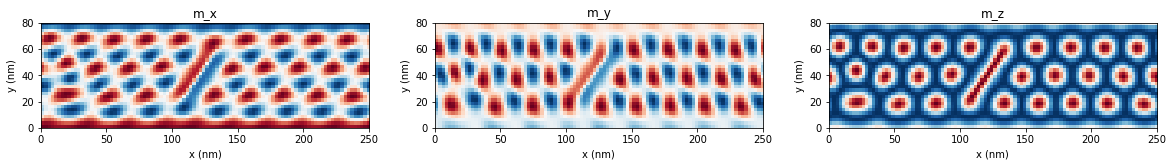

In [46]:
def plot_field(field, sim, fieldname, layer=0):
    nx = sim.mesh.nx
    ny = sim.mesh.ny
    n_layer = sim.mesh.nx * sim.mesh.ny
    m = field.reshape(-1, 3)
    
    fx = m[:, 0][layer*n_layer:(layer+1)*n_layer]
    fy = m[:, 1][layer*n_layer:(layer+1)*n_layer]
    fz = m[:, 2][layer*n_layer:(layer+1)*n_layer]
    fx.shape = (ny, nx)
    fy.shape = (ny, nx)
    fz.shape = (ny, nx)
    
    extent = [0, nx*sim.mesh.dx, 0, ny*sim.mesh.dy]
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(fx, extent=extent, cmap='RdBu', origin='lower')
    plt.title('{}_x'.format(fieldname))
    plt.xlabel('x (nm)')
    plt.ylabel('y (nm)')
    plt.subplot(1, 3, 2)
    plt.imshow(fy, extent=extent, cmap='RdBu', origin='lower')
    plt.xlabel('x (nm)')
    plt.ylabel('y (nm)')
    plt.title('{}_y'.format(fieldname))
    plt.subplot(1, 3, 3)
    plt.imshow(fz, extent=extent, cmap='RdBu', origin='lower')
    plt.xlabel('x (nm)')
    plt.ylabel('y (nm)')
    plt.title('{}_z'.format(fieldname))
    
plot_field(sim.spin, sim, 'm')

We now apply a field gradient which acts to move the Skyrmions. Below we construct a function to impose this gradient, and just plot the resulting Zeeman field.

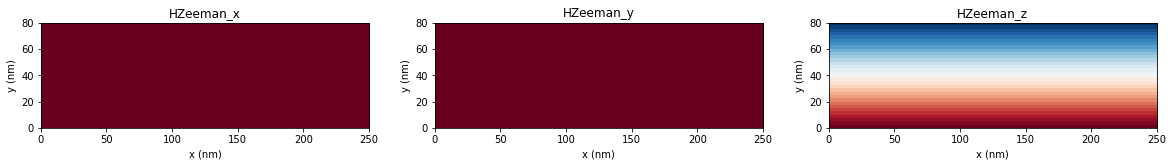

In [47]:
H0 = 0.3 / (4*np.pi*1e-7) # Apply a field of 0.4T

def H_Gradient(pos):
    x, y, z = pos
    return (0, 0, H0 * y/Ly)

zee = Zeeman(H_Gradient)
sim.add(zee)
plot_field(zee.field, sim, 'HZeeman')

We now evolve in time, showing snapshots of the magnetisation every 1ns.

i = 0, t = 0.0ns
i = 1, t = 1e-09ns
i = 2, t = 2e-09ns
i = 3, t = 3.0000000000000004e-09ns
i = 4, t = 4e-09ns
i = 5, t = 5e-09ns
i = 6, t = 6.000000000000001e-09ns
i = 7, t = 7.000000000000001e-09ns
i = 8, t = 8e-09ns
i = 9, t = 9.000000000000001e-09ns
i = 10, t = 1e-08ns


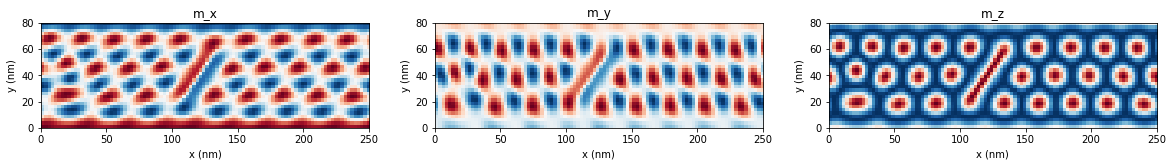

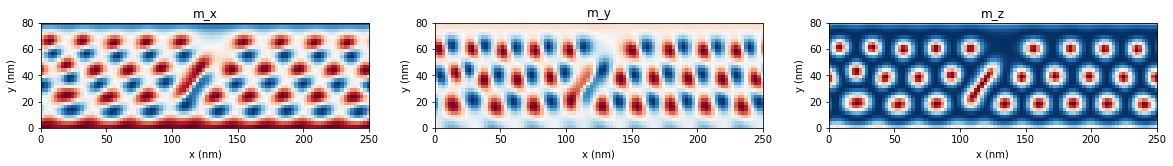

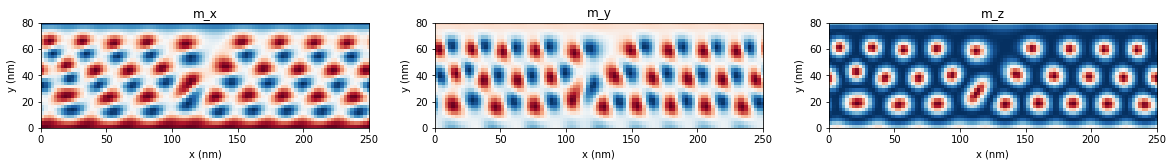

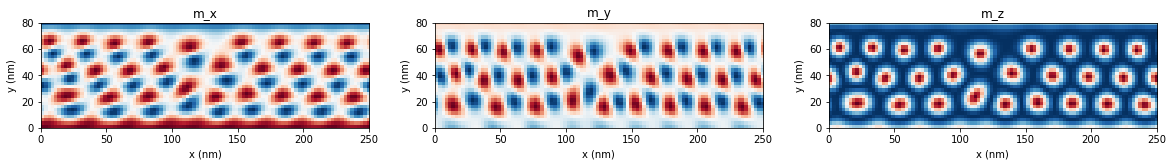

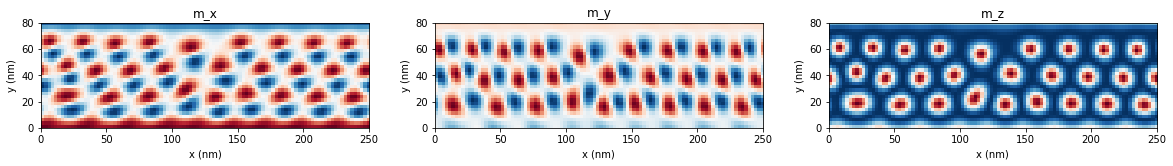

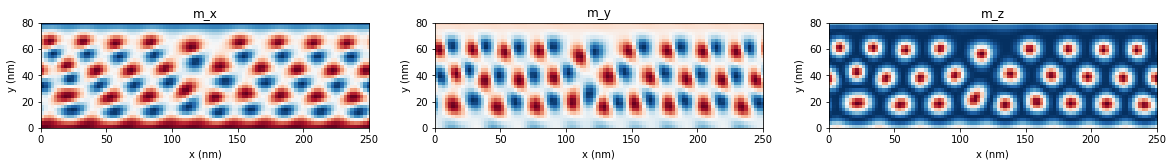

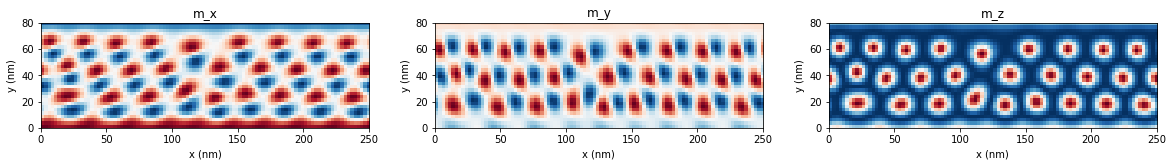

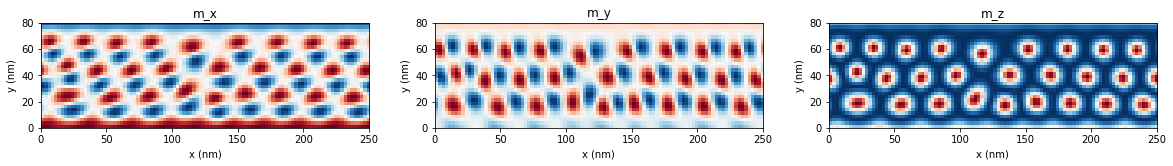

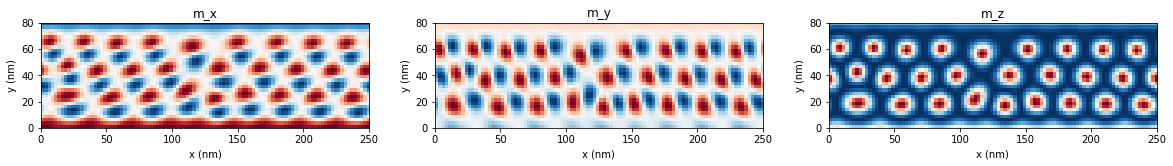

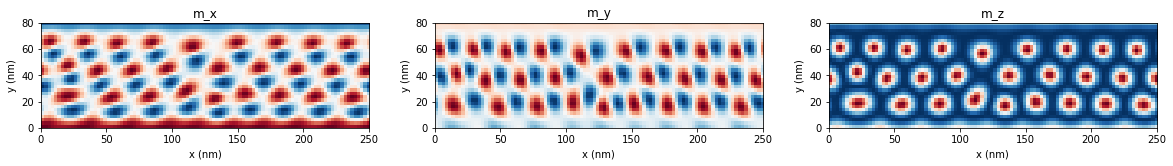

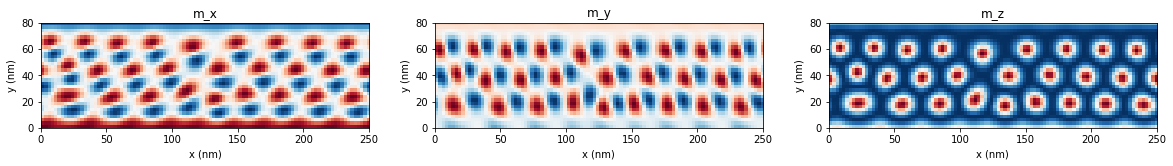

In [48]:
sim.driver.reset_integrator()
for i, t in enumerate(np.linspace(0, 20e-9, 21)):
    print('i = {}, t = {}ns'.format(i, t))
    sim.driver.run_until(t)
    plot_field(sim.spin, sim, 'm')


We can see that the core of the Skyrmions in the high-field region is smaller than than in the low field region, and there is some motion away from this area boundary.

We can also plot particular fields:

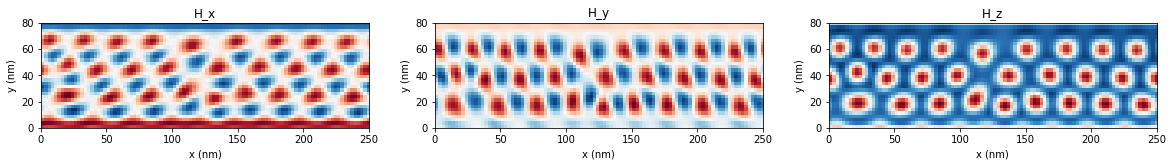

In [51]:
# Plot the Effective Field
plot_field(sim.driver.field, sim, 'H')

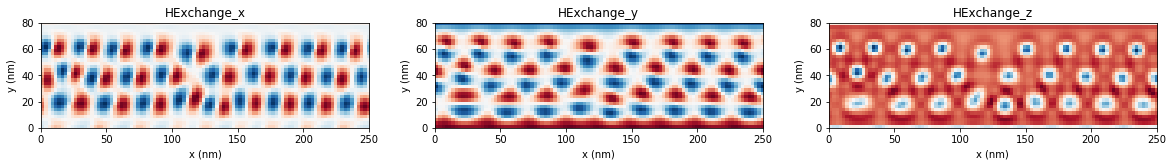

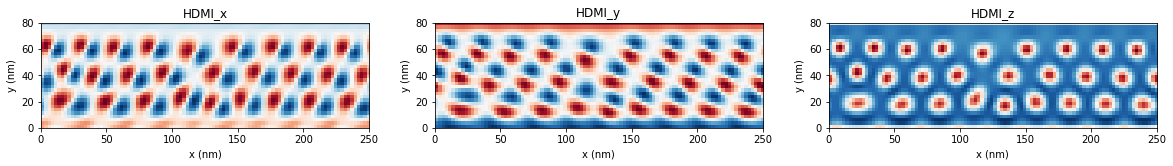

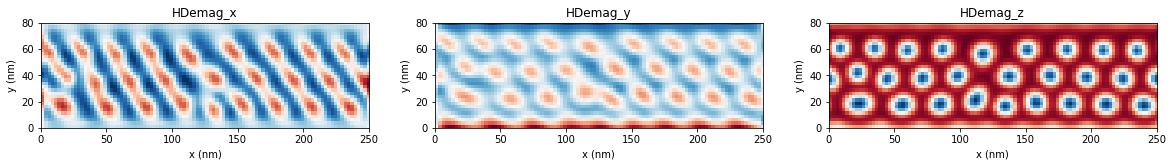

In [52]:
plot_field(sim.get_interaction('UniformExchange').field, sim, 'HExchange')

plot_field(sim.get_interaction('DMI').field, sim, 'HDMI')

plot_field(sim.get_interaction('Demag').field, sim, 'HDemag')